In [1]:
%cd ./vis

c:\Users\agata\Desktop\UNI\MSC\BIAM\Framsticks\framspy\frams-gecco-2024\vis


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import interpret


In [3]:
groupped_results = interpret.import_from_dir("../results/dpga/", lambda args: args["meta"] + " - F" + args["genformat"])
results_df = interpret.convert_to_dataframe(groupped_results)

In [4]:
custom_colors = {
    "MU_COMMA_LAMBDA - F0": "#006600",
    "MU_COMMA_LAMBDA - F1": "#33cc33",
    "MU_PLUS_LAMBDA - F0": "#990000",
    "MU_PLUS_LAMBDA - F1": "#ff0000",
    "SIMPLE - F0": "#3366cc",
    "SIMPLE - F1": "#66ccff",
    "DPGA - F0": "#ff9900",
    "DPGA - F1": "#ffcc66",
}

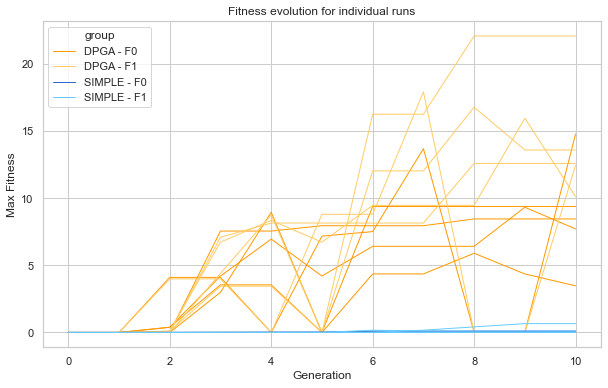

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="gen", y="max", hue="group", data=results_df, units="run_idx", estimator=None, lw=1, palette=custom_colors)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.title("Fitness evolution for individual runs")
plt.show()

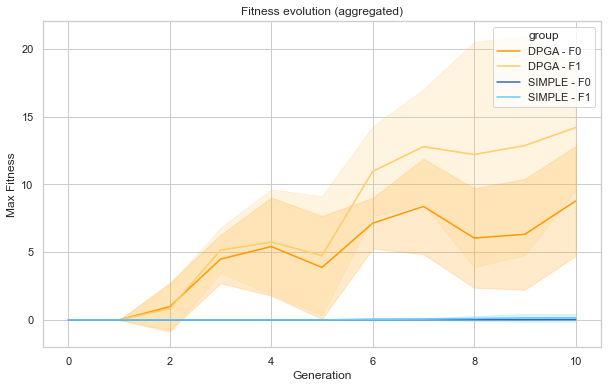

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="gen", y="max", hue="group", data=results_df, errorbar="sd", palette=custom_colors)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.title("Fitness evolution (aggregated)")
plt.show()

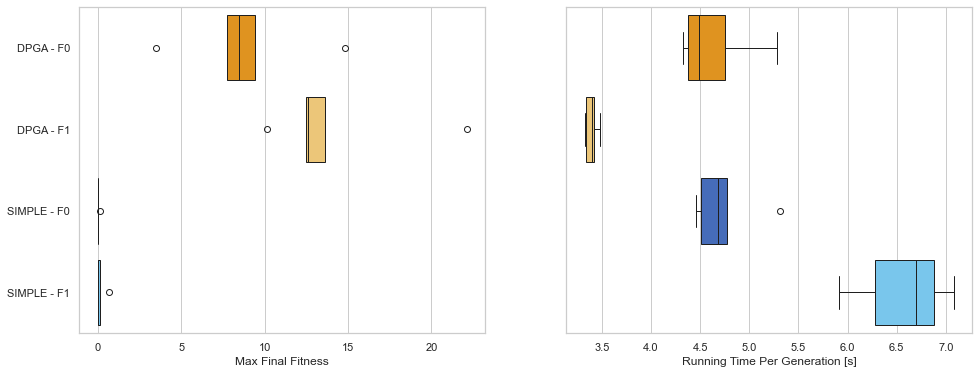

In [7]:
end_results = results_df[results_df["gen"] == results_df["gen"].max()].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(y="group", x="max", data=end_results, palette=custom_colors, hue="group", ax=axs[0])
axs[0].set_ylabel("")
axs[0].set_xlabel("Max Final Fitness")
sns.boxplot(y="group", x="gen_time_s", data=end_results, palette=custom_colors, hue="group", ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_xlabel("Running Time Per Generation [s]")
plt.show()